# Lecture 7: Lorenz Model and Fractals

**Overview:**
* The Lorenz model, intermittency and chaos.
* Fractals, a very simplified introduction.

**Next Lecture:**
* Boundary value problems.

---

In [4]:
%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

# just in time complitation, used when generating Mandelbrot fractal
from numba import jit


## Lorenz Model

Below we simulate and investigate the Lorenz model

In [7]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

In [8]:
# Lorenz paramters and initial conditions
# sigma, beta, rho = 10, 2.667, 28
sigma, beta, rho = 10, 2.667,28 
# u0, v0, w0 = 0, 1, 1.05
u0, v0, w0 = 1, 0, 0.0

# Maximum time point and total number of time points
tmax, n = 200, 5000


## Integrate the Lorenz equations on a time grid

### Periodic regime

<IPython.core.display.Javascript object>


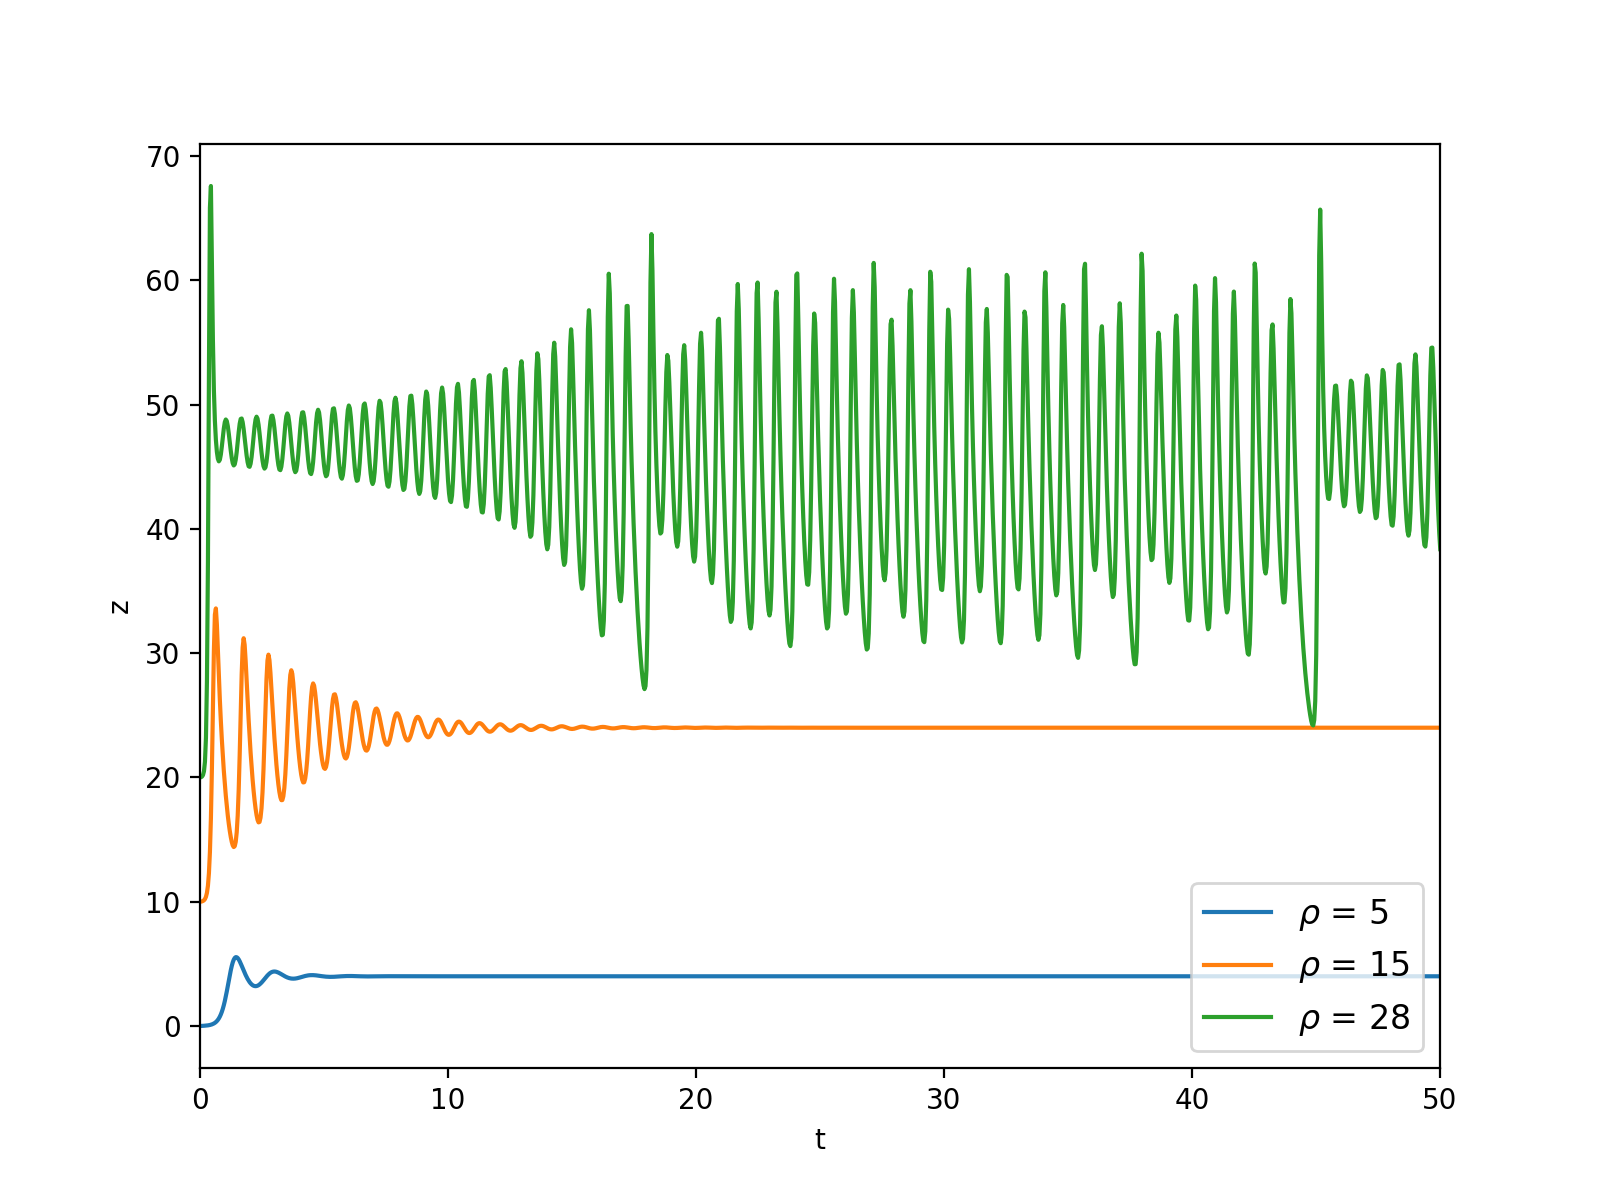

In [9]:
t = np.linspace(0, tmax, n)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)

rhos = [5,15,28] 
for ii in range(len(rhos)):
    f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rhos[ii]))
    x, y, z = f.T  # transpose
    
    ## add offset to trajectories for visualization purposes
    
    ax.plot(t, z+10*ii, label = "$\\rho$ = {}".format(rhos[ii]))

ax.set_xlim([0,50])
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.legend(loc = 4,fontsize = 12)


### Chaotic regime

<IPython.core.display.Javascript object>


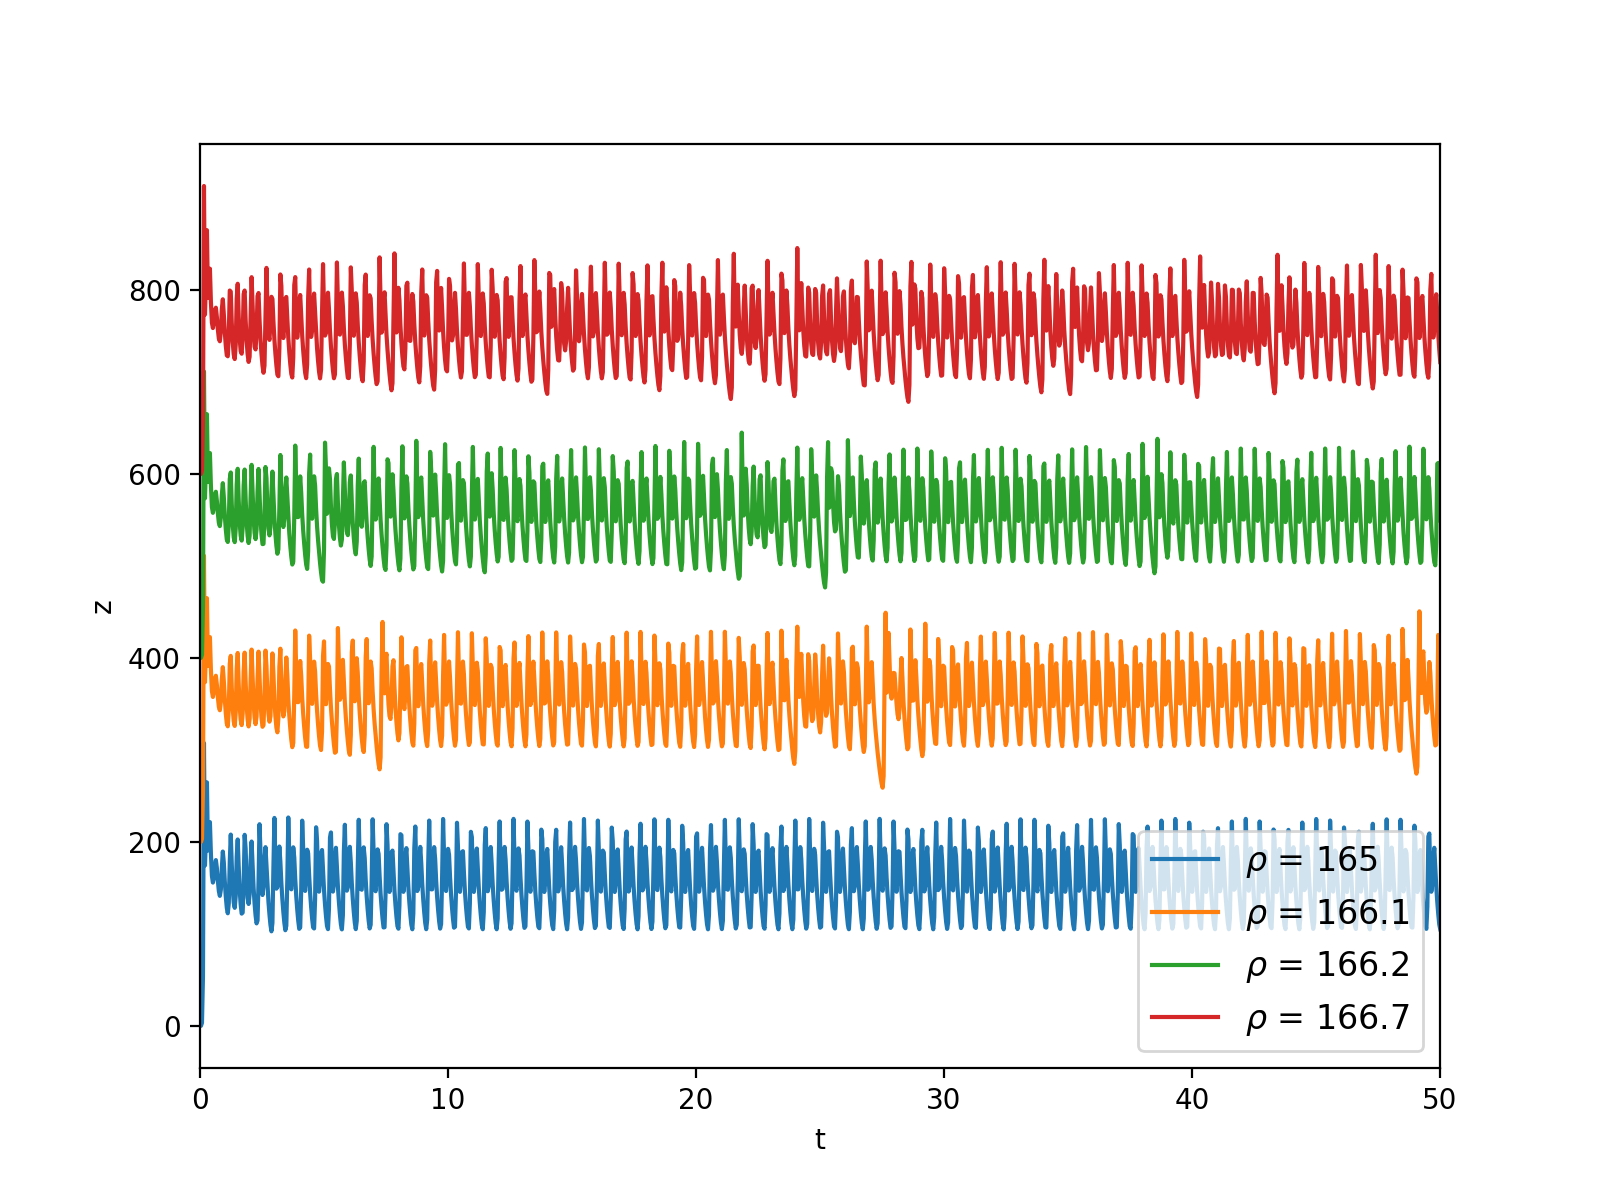

In [10]:
t = np.linspace(0, tmax, n)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)

rhos = [165,166.1, 166.2, 166.7]  
for ii in range(len(rhos)):
    f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rhos[ii]))
    x, y, z = f.T  # transpose
    ax.plot(t, z+200*ii, label = "$\\rho$ = {}".format(rhos[ii]))

ax.set_xlim([0,50])
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.legend(loc = 4,fontsize = 12)

### Tasks

* Can you plot the famous Lorenz attractor? Phase space has three dimensions here, so you will need to choose appropriate projections for a 2D plot.

* How might you construct a Poincare slice? (slice though a plane in phase space). Try to do so,

## Mandelbrot fractal

- Explore different regions of the domain of the Mandelbrot fractal. It's infinite, no one will ever see the entire thing!

- There are two new python concepts introduced here: function decorators (the @ symbol), and a method for speeding up python code by compiling (numba). 
   - Decorators can be very useful, but we won't need them for this course, if you are interested you can read more here: https://wiki.python.org/moin/PythonDecorators

   - Numba uses "just in time" compilation to speed up critical regions of python code. There are many other ways to speed up python these include: numpy and vectorized looping, `weave`, `cython`, or `f2py`, to name the few most common ones. We may need to use one or two of these tools later when we talk about Molecular Dynamics. There are many good online resources for these tools if you are interested in learning more.

In [5]:
# the @ is a decorator
# decorators are special python functions that modify a function.
@jit
def mandelbrot(c, maxiter):
    z = c
    for m in range(maxiter):
        if (z.real*z.real + z.imag*z.imag >= 4.0): 
            return m
        z = z*z + c
    return 0

def mandelbrot_set(x0,x_max,y0,y_max, nx, ny, maxiter):
    x, y = np.linspace(x0,x_max,nx), np.linspace(y0, y_max, ny)
    fractal = np.zeros((nx,ny,3))

    for i in range(nx):
        for k in range(ny):
            m = mandelbrot(x[i] + 1j*y[k], maxiter)
        
            fractal[i,k] = [m, 2*m, 3*m]
        
    return fractal

<IPython.core.display.Javascript object>


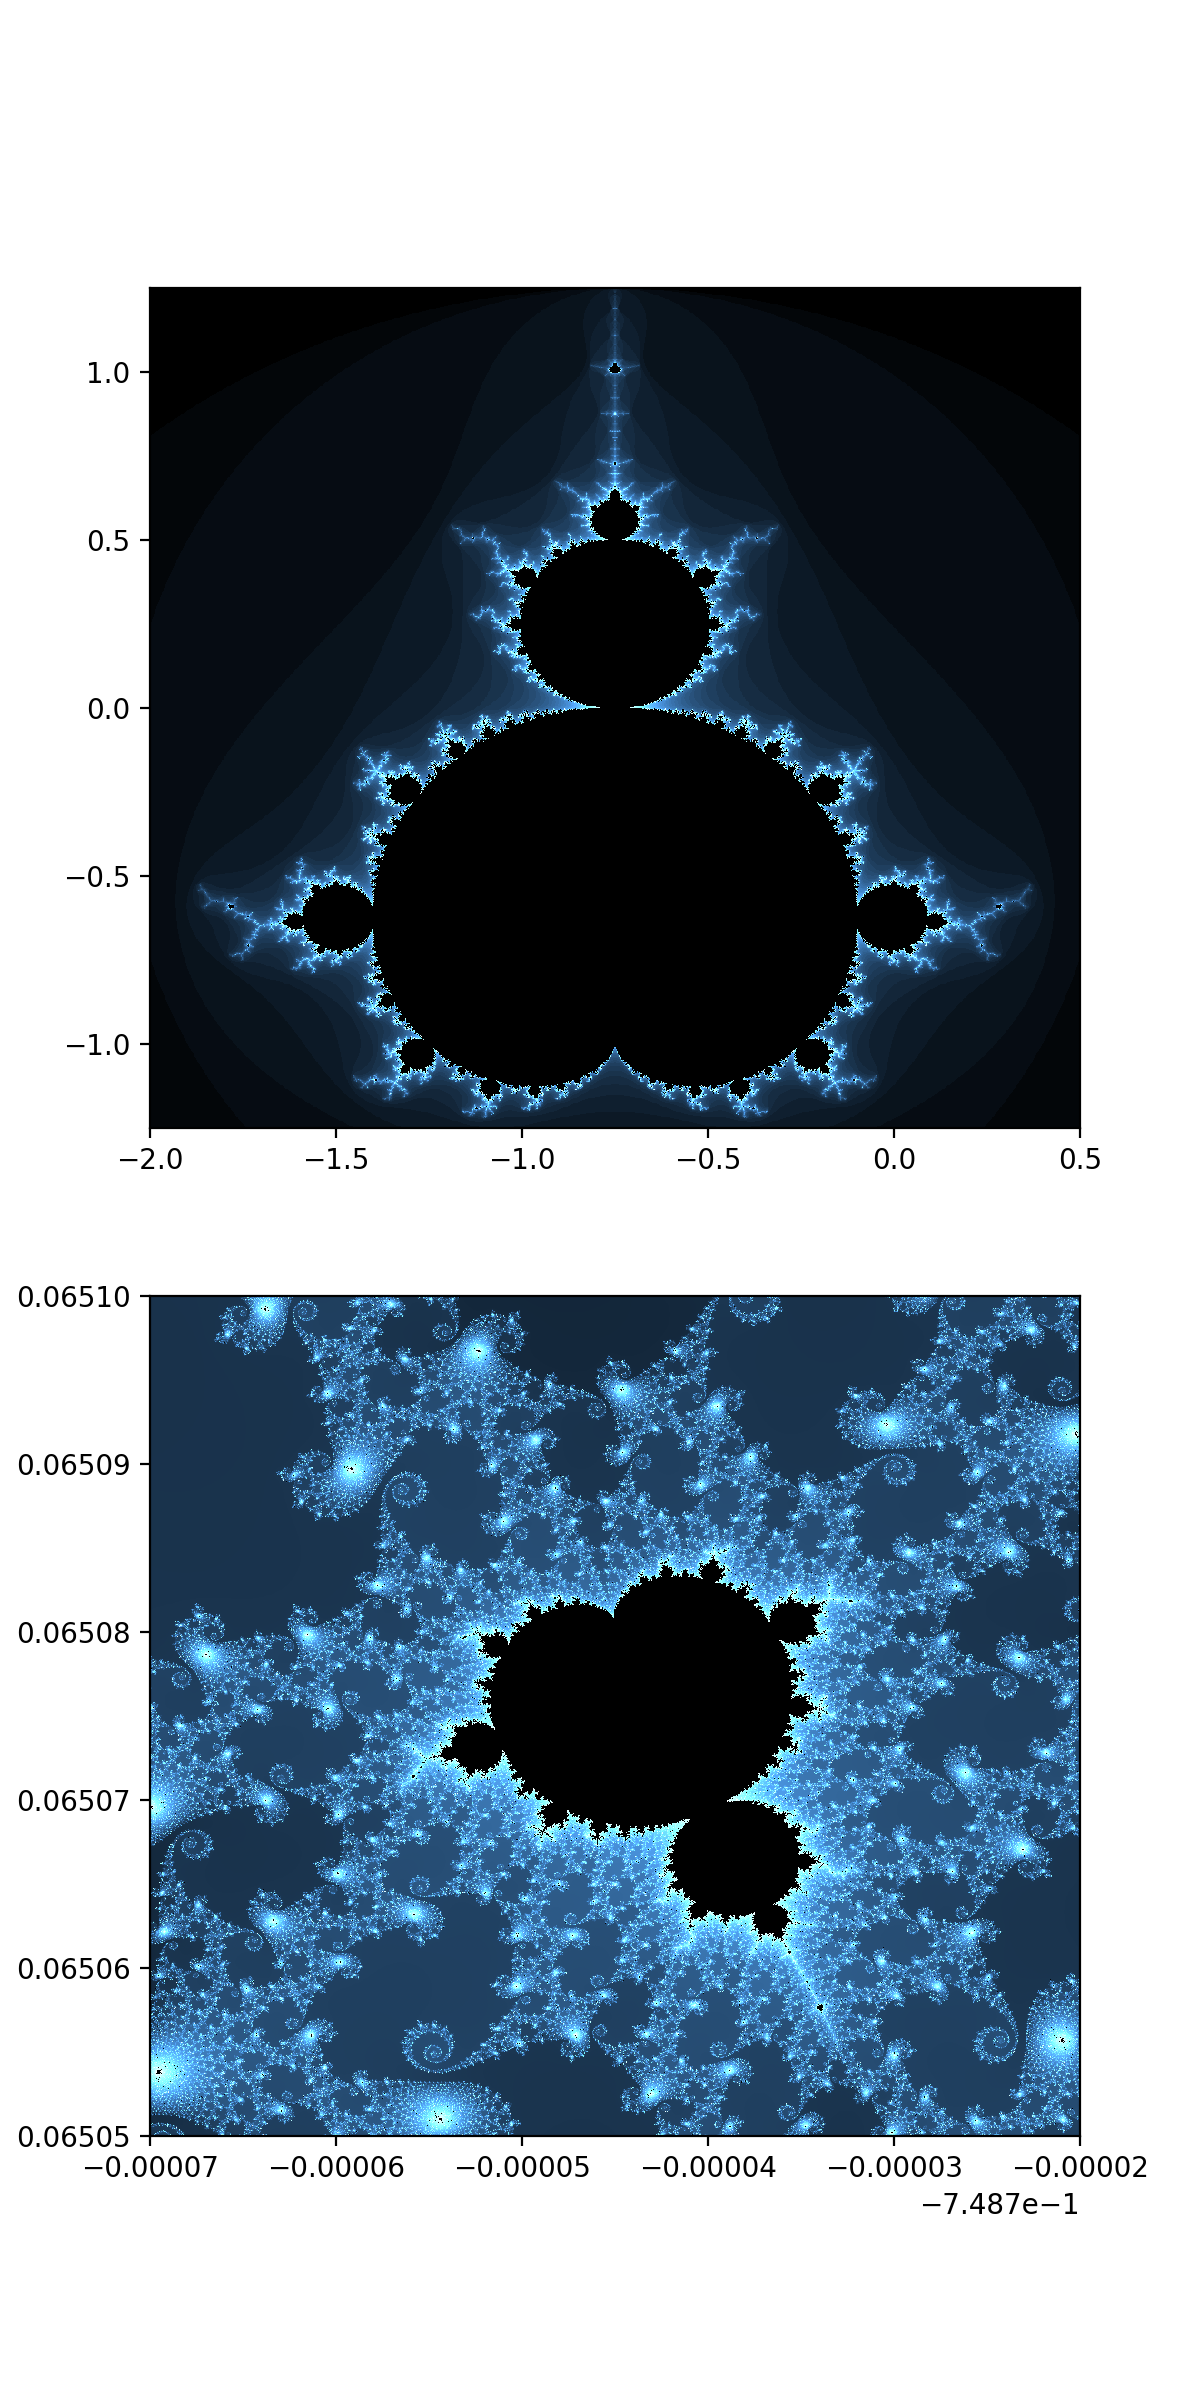

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [6]:
### Entire fractal
x0, x_max, y0, y_max = -2.0, 0.5, -1.25, 1.25
nx, ny, maxiter = 1024, 1024, 80

### Zoom in on a detailed region
x0_z, x_max_z, y0_z, y_max_z = -0.74877, -0.74872, 0.06505, 0.06510
maxiter_z = 2048


fractal = mandelbrot_set(x0,x_max,y0,y_max,nx,ny,maxiter)
fractal_zoom = mandelbrot_set(x0_z,x_max_z,y0_z,y_max_z,nx,ny,maxiter_z)


# using imshow to plot a colormap, this is one way to display an image in python
fig = plt.figure(figsize = [6,12])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.imshow(fractal/maxiter, extent = [x0,x_max,y0,y_max],  aspect='auto', clim = (0,5e-3))
ax2.imshow(fractal_zoom/maxiter_z, extent = [x0_z,x_max_z,y0_z,y_max_z],  aspect='auto', clim = (0,5e-6))
plt.show()
